<a href="https://colab.research.google.com/github/divyanx/ML/blob/main/FMML-Labs/LAB2/Lab2_FMML20210112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>
 Module Coordinator: Thrupthi Ann John thrupthi.ann@research.iiit.ac.in <br>
 Release date: 11 October 2021 Monday <br>

 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. 

Let us download and examine the dataset. 

In [2]:
 dataset =  datasets.fetch_california_housing()
 print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

/Users/divyansh/opt/anaconda3/envs/FMML/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


Here is a function for calculating the 1-nearest neighbours

In [3]:
def NN1(traindata, trainlabel, query):
  """
  Finds nearest neighbor for the query among all sampledata

  Args:
    traindata : collection of training data features (2D array)
    trainlabel : coresponding label for traindata
    query : a single feature vector

  Returns:
    label of data among train data which is nearest to the query
  """
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  """
  Finds nearest neighbor for all data in test data.

  Also see NN1

  Args:
    traindata : collection of training data features (mostly 2D array).
    trainlabel : coresponding label for traindata.
    testdata : a collection of test data (mostly 2D array).

  Returns:
    array of label of data among train data which is nearest to the each test 
    data.
  """
  # we will run nearest neighbour for each sample in the test data 
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel


We will also define a 'random classifier', which randomly allots labels to each sample

In [4]:
def RandomClassifier(traindata, trainlabel, testdata):
  """
  Assigns random labels to the test data.

  Args:
    traindata : collection of training data features (mostly 2D array).
    trainlabel : coresponding label for traindata.
    testdata : a collection of test data (mostly 2D array).

  Returns:
    array of labels assigned to testdata randomly from trainlabel
  """
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. 

In [5]:
def Accuracy(gtlabel, predlabel):
  """
  Finds the ratio of correctly assigned labels to total labels

  Args:
    gtlabel : correct ground truth labels array
    predlabel : predicted labels array

  Returns:
    fraction of correctly assigned labels to total number of labels
  """
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [6]:
def split(data, label, percent):
  """
  Splits data into two parts randomly in ratio given.

  Args:
    data : data collection to be split
    label : coresponding labels of data
    percent : ratio of size of two partisions, between 0 and 1
              ratio is of first/second

    Returns:
      first data partision, labels coresponding to first data partision,
      second data partision and labels coresponding to second data partision.
  """
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [7]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [8]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [9]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [10]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. 

Now let us try another random split and check the validation accuracy

In [11]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits. 
We notice that the accuracy is different for each run, but close together. 

Now let us compare it with the accuracy we get on the test dataset. 

In [12]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced? 

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

###Dependence of accuracy of validation set to the percentage of size of the set.
We can try different percentage and then plot the dependance to have a better view of dependance.

In [13]:
def findAccuracies(alltraindata, alltrainlabel, percentages):
  """
  Finds accuracies of validation data for different partision of all data into
  train data and validation data

  args:
    alltraindata: all train data available 
    alltrainlabel : labels coresponding to all traindata
    step : percentage step size from 0.1 to 100
  
  returns:
    returns array of all percentage partision from 0.1 to 100 step = step
  """
  accuracies = []
  for percent in percentages:
    #print(percent)
    traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, percent/100)
    valpred = NN(traindata, trainlabel, valdata)
    valAccuracy = Accuracy(vallabel, valpred)
    accuracies.append(valAccuracy)
  accur = np.array(accuracies)
  return accur

In [14]:
def getPercentageDistribution():
  x = np.append(np.arange(0.1,5,0.1) , np.arange(6,30,3))
  x = np.append(x, np.arange(30.,70.,10))
  x = np.append(x, np.arange(71.,94.,3))
  x = np.append(x, np.arange(94,99.9,0.1))
  return x

In [15]:
def plotValid(alltraindata, alltrainlabel, percentages):
  """
  plots the accuracy for various partisions varying from 0.1 % to 99.9 %
  of all data into train data and validation data.
  """
  accur = findAccuracies(alltraindata, alltrainlabel, percentages)
  assert percentages.size == accur.size
    
  # Plotting the Graph
  plt.plot(percentages, accur)
  plt.title("Dependency of validation accuracy on partision percentage")
  plt.xlabel("% of data used for training")
  plt.ylabel("Accuracy")
  plt.show()


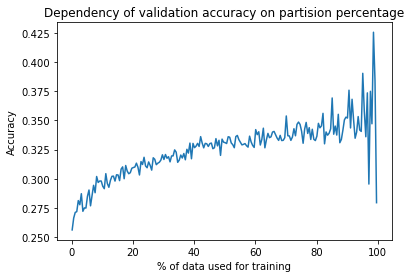

In [16]:
# plot the accuracy vs percentage
plotValid(alltraindata, alltrainlabel, np.arange(0.1,99.9, 0.5))

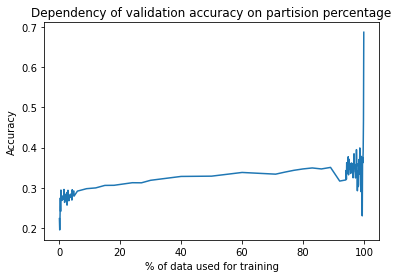

In [17]:
plotValid(alltraindata, alltrainlabel, getPercentageDistribution())

So we can see that the accuracy of the validation data increases mostly as we increase the share of the training data. Though the increase is not monotonic, that might be happening due to various reasons. 

We can also observe that for the cases when training data is very less, and when validation data which is used for testing is very less, then there is very hight fluctuation. Having very few data for training and testing is not a good idea, therefore.

**But we can conclude that more the share of train data more the accuracy**

### Effect of the share of validation data on the accuracy of the test data using the validation set.

Logically validation data should be as large as possible if we want to test accuracy based on it, however this might not always be true, suppose for a certain query and for some amount of validation data, if the validation data is very small, then lets suppose a case in which the NN in that validation data is the real label of the query so the accuracy wil be high, but if we add more data in validation data then there might be case when other data of different lables come close to our query, giving us wrong results, but this problem will arise only for lower amount of validation data, for large data the effect of more data should be towards more accuracy.

Lets test our hypothesis by plotting the accuracy of test data on validation data vs percentage of data used for validation.

In [18]:
def plotTest(alltraindata, alltrainlabel, testdata, testlabel):
  """
  Return accuracies for test data for different percentages of split size of
  traindata
  """
  percentages = getPercentageDistribution()
  accuracies = []
  print(alltraindata.size, alltraindata.size)
  for percent in percentages:
    #print(percent)
    _, _, valdata, vallabel = split(alltraindata, alltrainlabel, percent/100)
    #print(valdata.size, vallabel.size, testdata.size)
    testpred = NN(valdata, vallabel, testdata)
    testAccuracy = Accuracy(testlabel, testpred)
    accuracies.append(testAccuracy)

  accur = np.array(accuracies)
  percentagesValid = np.array([100.]*percentages.size)
  percentagesValid -= percentages
  plt.plot(percentagesValid, accur)
  plt.title("Dependency of test accuracy on partision percentage")
  plt.xlabel("fraction of data used for validation")
  plt.ylabel("Accuracy")
  plt.show()


131968 131968


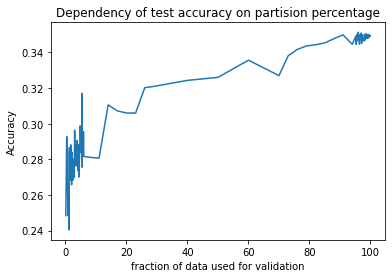

In [19]:
plotTest(alltraindata, alltrainlabel, testdata, testlabel)

Here also, like the previous case, we can see that the overall nature is inceremental, except when the data for trainng is very less, where we can see fluctuations. This again is the case when data is too less for training, which as told is a bad idea.

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. 

In [20]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [21]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3388786242686196
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


**1. 
Averaging across multiple splits should give more consistent accuracies, specially when the amount of data is less, in that case randomisation may not be enough to get a consistent result, so averaging might help.**

**2. 
In, this particular case, there is not much effect as the split is good and also the data size is large enough, but if we had less amount of data, then it might turn out to be useful.**

### Effect of number of iterations.

In [26]:
iteration = np.arange(1,30,5)
accuracies1 = np.array([AverageAccuracy(alltraindata, alltrainlabel, 75/100, it, classifier=NN) for it in iteration])
accuracies2 = np.array([AverageAccuracy(alltraindata, alltrainlabel, 25/100, it, classifier=NN) for it in iteration])

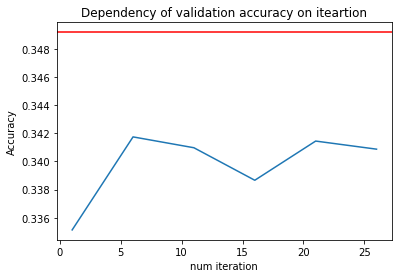

In [27]:
plt.plot(iteration, accuracies1)
testpred = NN(alltraindata, alltrainlabel, testdata)
plt.axhline(y = Accuracy(testlabel, testpred), color = 'r', linestyle = '-')
plt.title("Dependency of validation accuracy on iteartion")
plt.xlabel("num iteration")
plt.ylabel("Accuracy")
plt.show()

So upto a certai iteration, the accuracy seems improving, but then it remains almost constant.

In [33]:
iteration = np.arange(1,1000,5)
accuracies1 = np.array([AverageAccuracy(alltraindata[:100], alltrainlabel[:100], 75/100, it, classifier=NN) for it in iteration])
accuracies2 = np.array([AverageAccuracy(alltraindata[:100], alltrainlabel[:100], 25/100, it, classifier=NN) for it in iteration])


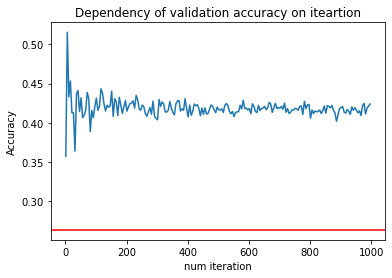

In [32]:
testpred = NN(alltraindata[:100], alltrainlabel[:100], testdata)
plt.plot(iteration, accuracies1)
plt.axhline(y = Accuracy(testlabel, testpred), color = 'r', linestyle = '-')
plt.title("Dependency of validation accuracy on iteartion")
plt.xlabel("num iteration")
plt.ylabel("Accuracy")
plt.show()

So we can see that, when data is very less, iterations isnt helping at all to estimate the actual accuracy.